In [1]:
from keras.datasets import imdb
imdb.allow_pickle = True
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# 仅保留前 1W 的单词

Using TensorFlow backend.


In [2]:
train_data[0]

[1,
 4,
 65,
 347,
 16,
 55,
 730,
 930,
 5,
 776,
 8,
 794,
 5,
 3887,
 6,
 176,
 7,
 57,
 2,
 212,
 8,
 6,
 213,
 121,
 12,
 43,
 188,
 357,
 49,
 7,
 4,
 311,
 468,
 8,
 169,
 12,
 163,
 21,
 13,
 40,
 53,
 1089,
 486,
 10,
 10,
 50,
 71,
 450,
 573,
 3923,
 156,
 11,
 4,
 20,
 5,
 68,
 239,
 71,
 542,
 1069,
 4,
 229,
 4571,
 2,
 16,
 52,
 267,
 17,
 210,
 10,
 10,
 13,
 92,
 377,
 4,
 204,
 20,
 38,
 13,
 191,
 135,
 48,
 45,
 128,
 42,
 433,
 10,
 10,
 48,
 25,
 358,
 102,
 40,
 2,
 14,
 20,
 238,
 30,
 290,
 656,
 6,
 168,
 33]

In [4]:
train_labels[0]

0

### 限定了前10000个常见的词，所有的单词的索引都不超过10000。

In [5]:
max([max(sequence) for sequence in train_data])

9999

 可以将评论转换成对应的英文原文：
 * 其中索引0，1，2的字符都是特殊字符

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for [key, value] in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? the story line was very straight forward and easy to follow and contained a lot of no ? comedy to a point where it just got boring some of the audience seemed to find it funny but i like more intelligent humor br br there were several known swedish actors in the movie and their performance were decent considering the script lena ? was good looking as always br br i don't remember the original movie so i can't say if it's better or worse br br if you enjoy movies like ? this movie might be worth taking a look at


In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
# 数据向量化
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
# 标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
y_train

array([0., 0., 0., ..., 1., 0., 0.], dtype=float32)

In [17]:
len(x_train[0])

10000

实现一个 Dense 层的网络架构，包括以下层次：
* 2个中间层，每层有16个隐藏单元，使用relu激活函数
* 第3层 sigmod 输出一个标量，预测当前的情感

In [19]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [21]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


需要将数据留1w个作为验证集

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

分成512个样本的批次，训练20轮，并在留出的 1W 样本上验证精确度。

In [23]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 4s 288us/step - loss: 0.5105 - acc: 0.7841 - val_loss: 0.4131 - val_acc: 0.8348
Epoch 2/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.3046 - acc: 0.9009 - val_loss: 0.3092 - val_acc: 0.8873
Epoch 3/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.2254 - acc: 0.9286 - val_loss: 0.2878 - val_acc: 0.8906
Epoch 4/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.1782 - acc: 0.9437 - val_loss: 0.2806 - val_acc: 0.8911
Epoch 5/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1447 - acc: 0.9566 - val_loss: 0.3046 - val_acc: 0.8825
Epoch 6/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.1189 - acc: 0.9637 - val_loss: 0.3001 - val_acc: 0.8

fit函数会返回一个训练过程的记录：history对象。

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

画出训练损失&验证损失图：

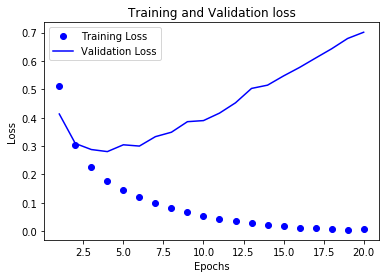

In [26]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

画出训练精度和验证精度图形：

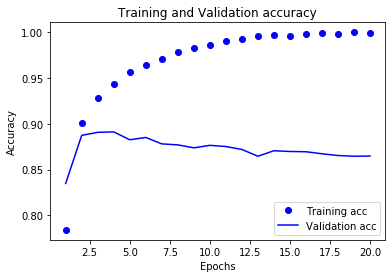

In [27]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

效果并不是越来越好，后续都过拟合了，将轮数下降到4轮：

In [35]:
history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 3s 118us/step - loss: 0.0229 - acc: 0.9950 - val_loss: 0.0286 - val_acc: 0.9944
Epoch 2/4
25000/25000 [==============================] - 3s 117us/step - loss: 0.0190 - acc: 0.9960 - val_loss: 0.0227 - val_acc: 0.9970
Epoch 3/4
25000/25000 [==============================] - 3s 117us/step - loss: 0.0122 - acc: 0.9984 - val_loss: 0.0176 - val_acc: 0.9980
Epoch 4/4
25000/25000 [==============================] - 1s 45us/step


In [38]:
history_dict = history.history
results

[0.8913023912119865, 0.8514]

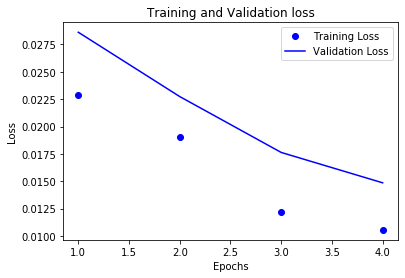

In [39]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

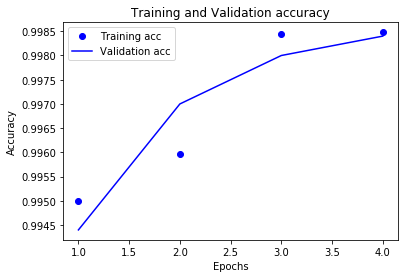

In [40]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 从上述结果可以看到训练结果：85.8%精确度

In [43]:
predict_data = model.predict(x_test)
sure_count = 0
not_sure_count = 0
for i in predict_data:
    if i < 0.01 or i > 0.99:
        sure_count += 1
    else:
        not_sure_count += 1
print('sure:' + str(sure_count / len(predict_data) * 100 ) + '%')
print('not sure:' + str(not_sure_count / len(predict_data) * 100 ) + '%')

sure:78.56%
not sure:21.44%


可以看出，对部分结果比较确定：大于0.99或小于0.01，但是部分又不确定。78%的确定（大于0.99或小于0.01），21%不确定。